# Importing Necessary Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Cleaning

In [2]:
# Loading train data
train_df = pd.read_csv('train.csv', index_col='PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Loading test data
test_df = pd.read_csv('test.csv', index_col='PassengerId')
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_df.info())
print('-'*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       

###  **Insights:**
* Data type and format of each feature is correct.
* There are missing values in Age, Cabin, and Embarked columns of train dataset.
* There are missing values in Age, Cabin, and Fare columns of test dataset.

In [5]:
# Categorical Variables Description
print(train_df['Sex'].value_counts())
print('-'*50)
print(f'Number of unique values in "Cabin" column: {train_df.Cabin.nunique()}')
print('-'*50)
print(train_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
--------------------------------------------------
Number of unique values in "Cabin" column: 147
--------------------------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
# Numerical Variables Description
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Nominal Variables Description
train_df.Name.sample(10)

PassengerId
136                     Richard, Mr. Emile
826                        Flynn, Mr. John
88           Slocovski, Mr. Selman Francis
546           Nicholson, Mr. Arthur Ernest
317    Kantor, Mrs. Sinai (Miriam Sternin)
342         Fortune, Miss. Alice Elizabeth
98         Greenfield, Mr. William Bertram
221         Sunderland, Mr. Victor Francis
235      Leyson, Mr. Robert William Norman
746           Crosby, Capt. Edward Gifford
Name: Name, dtype: object

###  **Insights:**
* All the features have reasonable data. Therefore, no need to correct values.  

In [8]:
# Creating age table to fill missing values in Age Column
age_table = train_df.groupby(['Pclass', 'Sex', 'Embarked']).Age.median().reset_index()
age_table

,Pclass,Sex,Embarked,Age
0,1,female,C,37.00
1,1,female,Q,33.00
2,1,female,S,33.00
3,1,male,C,36.50
4,1,male,Q,44.00
5,1,male,S,42.00
6,2,female,C,22.00
7,2,female,Q,30.00
8,2,female,S,29.00
9,2,male,C,29.50


* We will use above age table consisting of median age for each combination of Pclass, Sex, and Embarked for better estimation of missing values in Age column.
* We will fill 'S' in the Embarked column for missing values because it is the most frequent embarkation port.
* We will use median fare for filling the missing values in Fare column. 
* We will not consider Cabin column as it contains more than 75% missing values.

In [9]:
# Filling the missing values
def find_age(row):
    if pd.isnull(row[3]):
        Pclass = row[0]
        Sex = row[1]
        Embarked = row[2]
        return age_table[(age_table.Pclass==Pclass) & (age_table.Sex==Sex) & (age_table.Embarked==Embarked)]['Age'].iloc[0]
    else:
        row[3]

train_df.fillna(value={'Embarked':'S', 'Age':train_df[['Pclass', 'Sex', 'Embarked', 'Age']].apply(find_age, axis=1)}, inplace=True)
test_df.fillna(value={'Fare':test_df.Fare.median(), 'Age':test_df[['Pclass', 'Sex', 'Embarked', 'Age']].apply(find_age, axis=1)}, inplace=True)
train_df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
630,0,3,"O'Connell, Mr. Patrick D",male,27.0,0,0,334912,7.7333,NaN,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


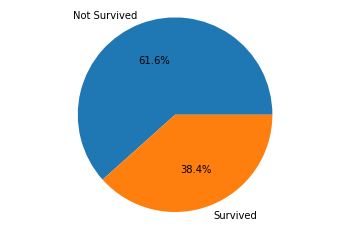

In [10]:
# Class Imbalance Check
plt.pie(train_df.Survived.value_counts(), labels=['Not Survived', 'Survived'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

###  **Insights:**
* This is not a class imbalance problem.

# Data Visualization

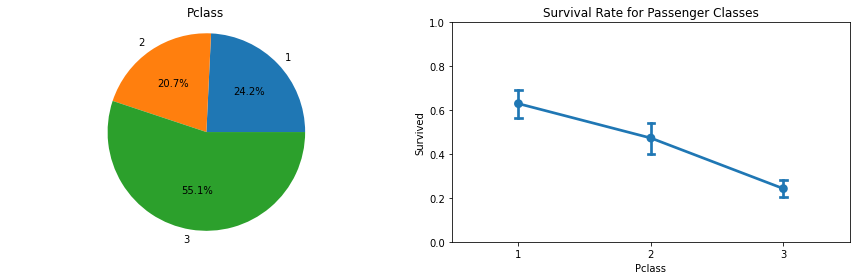

In [11]:
# Pclass distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
plt.pie(train_df.Pclass.value_counts().sort_index(), labels=['1', '2', '3'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Pclass')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df, x='Pclass', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Passenger Classes')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

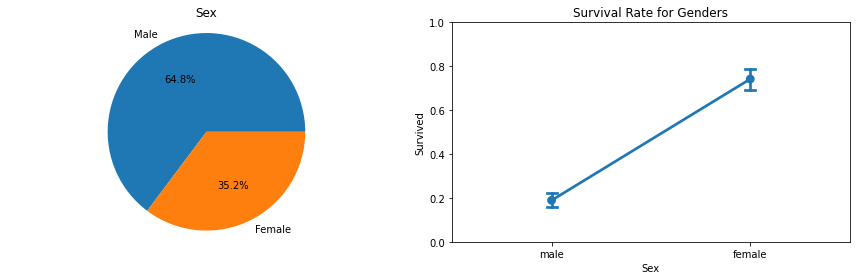

In [12]:
# Sex distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
plt.pie(train_df.Sex.value_counts(), labels=['Male', 'Female'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Sex')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df, x='Sex', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Genders')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

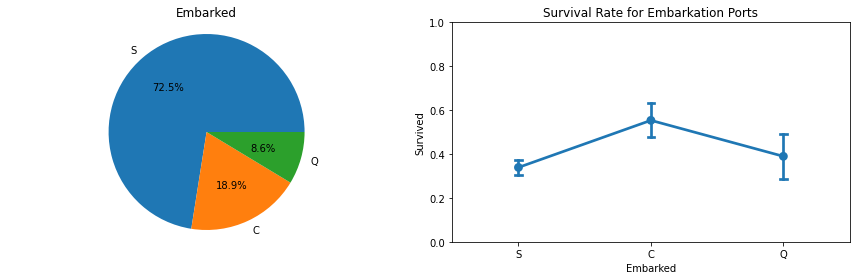

In [13]:
# Embarkation ports distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
plt.pie(train_df.Embarked.value_counts(), labels=['S', 'C', 'Q'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Embarked')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df, x='Embarked', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Embarkation Ports')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

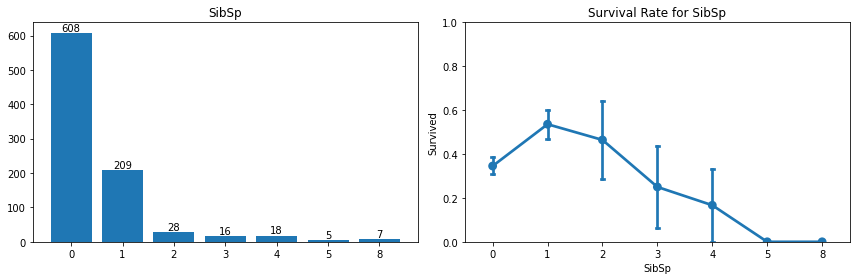

In [14]:
# SibSp distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
x = np.arange(len(train_df.SibSp.value_counts().sort_index()))
y = train_df.SibSp.value_counts().sort_index()
vbar = plt.bar(x, y)
plt.xticks(x, train_df.SibSp.value_counts().sort_index().index)
plt.bar_label(vbar)
plt.title('SibSp')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df, x='SibSp', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for SibSp')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

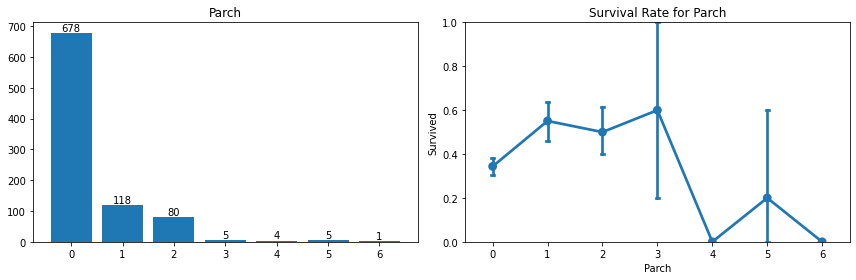

In [15]:
# Parch distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
x = np.arange(len(train_df.Parch.value_counts().sort_index()))
y = train_df.Parch.value_counts().sort_index()
vbar = plt.bar(x, y)
plt.xticks(x, train_df.Parch.value_counts().sort_index().index)
plt.bar_label(vbar)
plt.title('Parch')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df, x='Parch', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Parch')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

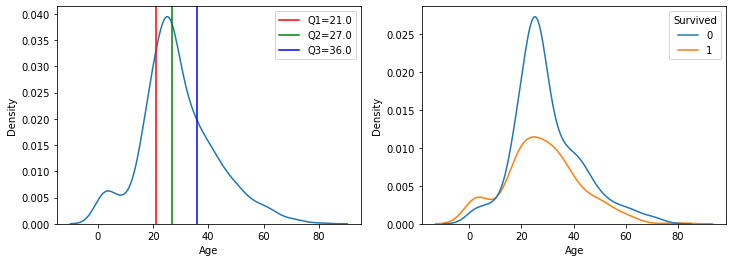

In [16]:
# Age distribution and its relation with the survival
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
sns.kdeplot(train_df.Age)
quartiles = np.quantile(train_df.Age, [0.25, 0.50, 0.75])
colors = ['r', 'g', 'b']
labels = ['Q1', 'Q2', 'Q3']
for q, c, l in zip(quartiles, colors, labels):
    plt.axvline(x=q, c=c, label=l+f'={q}')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
sns.kdeplot(data=train_df, x='Age', hue='Survived')

plt.show()

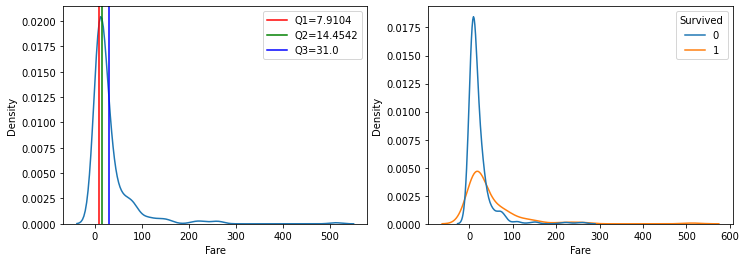

In [17]:
# Fare distribution and its relation with the survival
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
sns.kdeplot(train_df.Fare)
quartiles = np.quantile(train_df.Fare, [0.25, 0.50, 0.75])
colors = ['r', 'g', 'b']
labels = ['Q1', 'Q2', 'Q3']
for q, c, l in zip(quartiles, colors, labels):
    plt.axvline(x=q, c=c, label=l+f'={q}')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
sns.kdeplot(data=train_df, x='Fare', hue='Survived')

plt.show()

###  **Insights:**
* Pclass, Sex, and Embarked columns can be seen to have an impact on survival.
* SibSp and Parch columns are non-uniformly distributed among their categories. Moreover, they do not clearly exhibit relationship with the survival with the current distribution.
* Age and Fare columns show a considerable relationship with the survival.

# Feature Engineering

In [18]:
# Combining SibSp and Parch columns to create Family column to find a better relation with survival
train_df_fe = train_df.copy()
test_df_fe = test_df.copy()
combined = [train_df_fe, test_df_fe]

for df in combined:
    df['Family'] = df['SibSp'] + df['Parch']
    df['Family'] = df.Family.apply(lambda x: x if x in [0, 1, 2] else 3)
train_df_fe.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
675,0,2,"Watson, Mr. Ennis Hastings",male,30.0,0,0,239856,0.0000,NaN,S,0
795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S,0
552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S,0
619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,3
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1


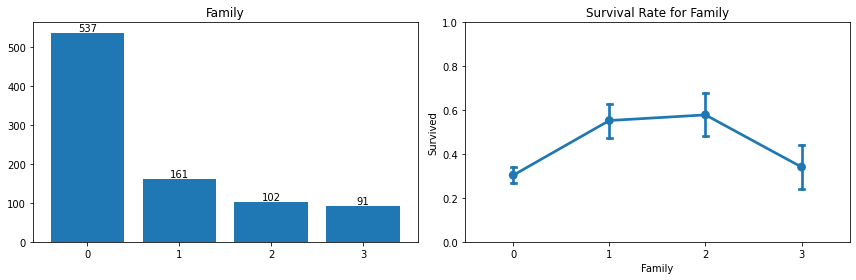

In [19]:
# Family distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
x = np.arange(len(train_df_fe.Family.value_counts().sort_index()))
y = train_df_fe.Family.value_counts().sort_index()
vbar = plt.bar(x, y)
plt.xticks(x, train_df_fe.Family.value_counts().sort_index().index)
plt.bar_label(vbar)
plt.title('Family')

# Subplot 2
plt.subplot(1, 2, 2)
sns.pointplot(data=train_df_fe, x='Family', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Family')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

###  **Insights:**
* Family column can be seen to have better relationship with the survival as compared to SibSp and Parch columns.

In [20]:
# Extracting the titles from the Name column
for df in combined:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df.Title.apply(lambda title: title if title in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')
train_df_fe.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
PassengerId,,,,,,,,,,,,,
353,0,3,"Elias, Mr. Tannous",male,15.00,1,1,2695,7.2292,NaN,C,2,Mr
141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,14.25,0,2,2678,15.2458,NaN,C,2,Mrs
848,0,3,"Markoff, Mr. Marin",male,35.00,0,0,349213,7.8958,NaN,C,0,Mr
366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.00,0,0,C 7076,7.2500,NaN,S,0,Mr
521,1,1,"Perreault, Miss. Anne",female,30.00,0,0,12749,93.5000,B73,S,0,Miss


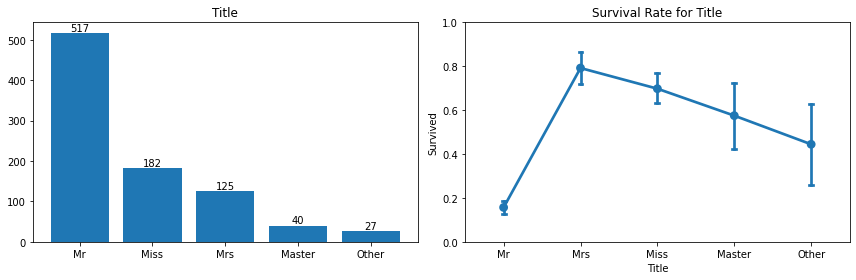

In [21]:
# Title distribution and its relation with the survival rate
plt.figure(figsize=(12, 4))

# Subplot 1
plt.subplot(1, 2, 1)
x = np.arange(len(train_df_fe.Title.value_counts()))
y = train_df_fe.Title.value_counts()
vbar = plt.bar(x, y)
plt.xticks(x, train_df_fe.Title.value_counts().index)
plt.bar_label(vbar)
plt.title('Title')

# Subplot 2
plt.subplot(1,2,2)
sns.pointplot(data=train_df_fe, x='Title', y='Survived', estimator=np.mean, capsize=0.05)
plt.ylim([0, 1])
plt.title('Survival Rate for Title')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

###  **Insights:**
* Title column also exhibits considerable relationship with the survival.

# Data Preprocessing

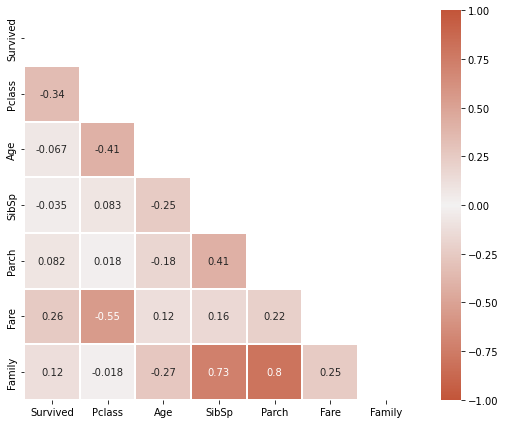

In [22]:
# Multicollinearity Check
plt.figure(figsize=(8, 6))
corr = train_df_fe.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(20, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True, linewidth=0.05, square=True)
plt.tight_layout()
plt.show()

###  **Insights:**
* As Family column is derived from SibSp and Parch columns, they have a significantly high correlation. Therefore, we will use only Family column.

In [23]:
# Feature Selection
x_train_features = train_df_fe[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Title']]
x_test_features = test_df_fe[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Title']]
y_train = train_df_fe['Survived']
x_train_features.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Title
PassengerId,,,,,,,
1,3,male,22.0,7.2500,S,1,Mr
2,1,female,38.0,71.2833,C,1,Mrs
3,3,female,26.0,7.9250,S,0,Miss
4,1,female,35.0,53.1000,S,1,Mrs
5,3,male,35.0,8.0500,S,0,Mr


In [24]:
# Label Encoding
x_train_encoded1 = x_train_features.replace({'Sex': {'male':0, 'female':1}})
x_test_encoded1 = x_test_features.replace({'Sex': {'male':0, 'female':1}})
x_train_encoded1.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Title
PassengerId,,,,,,,
1,3,0,22.0,7.2500,S,1,Mr
2,1,1,38.0,71.2833,C,1,Mrs
3,3,1,26.0,7.9250,S,0,Miss
4,1,1,35.0,53.1000,S,1,Mrs
5,3,0,35.0,8.0500,S,0,Mr


In [25]:
# One-Hot Encoding
x_train_encoded2 = pd.get_dummies(x_train_encoded1, columns=['Embarked', 'Title'], drop_first=True)
x_test_encoded2 = pd.get_dummies(x_test_encoded1, columns=['Embarked', 'Title'], drop_first=True)
x_train_encoded2.head()

,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,
1,3,0,22.0,7.2500,1,0,1,0,1,0,0
2,1,1,38.0,71.2833,1,0,0,0,0,1,0
3,3,1,26.0,7.9250,0,0,1,1,0,0,0
4,1,1,35.0,53.1000,1,0,1,0,0,1,0
5,3,0,35.0,8.0500,0,0,1,0,1,0,0


In [26]:
# Converting DataFrames to Arrays
x_train_arr = x_train_encoded2.values
x_test_arr = x_test_encoded2.values
y_train_arr = y_train.values
x_train_arr[0]

array([ 3.  ,  0.  , 22.  ,  7.25,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,
        0.  ,  0.  ])

In [27]:
# Standardization
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train_arr)
x_test_norm = scaler.transform(x_test_arr)

x_train_norm[0]

array([ 0.82737724, -0.73769513, -0.53366019, -0.50244517,  0.2777598 ,
       -0.30756234,  0.61583843, -0.50665528,  0.85053175, -0.4039621 ,
       -0.1767767 ])

# Prediction using ML Models

KNN: Maximum accuracy is 0.813 at k=11


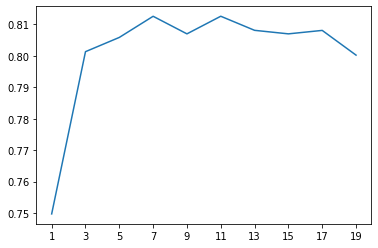

In [28]:
# K-Nearest Neighbors Classifier (KNN)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

k_values = []
knc_accuracy = []
for k in range(1, 20, 2):
    knc = KNeighborsClassifier(n_neighbors=k)
    scores_knc = cross_val_score(knc, x_train_norm, y_train_arr, cv=cv)
    knc_accuracy.append(scores_knc.mean())
    k_values.append(k)
print(f'KNN: Maximum accuracy is {np.round(max(knc_accuracy), 3)} at k={k_values[knc_accuracy.index(max(knc_accuracy))]}')

plt.plot(k_values, knc_accuracy)
plt.xticks(k_values)
plt.show()

In [29]:
# Logistic Regression
lr = LogisticRegression()
scores_lr = cross_val_score(lr, x_train_norm, y_train_arr, cv=cv)
print(f'Logistic Regression: Accuracy={np.round(scores_lr.mean(), 3)} and Standard Deviation={np.round(scores_lr.std(), 3)}')

# Support Vector Classifier
svc = SVC()
scores_svc = cross_val_score(svc, x_train_norm, y_train_arr, cv=cv)
print(f'Support Vector Classifier: Accuracy={np.round(scores_svc.mean(), 3)} and Standard Deviation={np.round(scores_svc.std(), 3)}')

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
scores_dtc = cross_val_score(dtc, x_train_norm, y_train_arr, cv=cv)
print(f'Decision Tree Classifier: Accuracy={np.round(scores_dtc.mean(), 3)} and Standard Deviation={np.round(scores_dtc.std(), 3)}')

# Random Forest Classifier
rfc = RandomForestClassifier()
scores_rfc = cross_val_score(rfc, x_train_norm, y_train_arr, cv=cv)
print(f'Random Forest Classifier: Accuracy={np.round(scores_rfc.mean(), 3)} and Standard Deviation={np.round(scores_rfc.std(), 3)}')

# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, x_train_norm, y_train_arr, cv=cv)
print(f'Gaussian Naive Bayes Classifier: Accuracy={np.round(scores_gnb.mean(), 3)} and Standard Deviation={np.round(scores_gnb.std(), 3)}')

Logistic Regression: Accuracy=0.822 and Standard Deviation=0.04
Support Vector Classifier: Accuracy=0.82 and Standard Deviation=0.042
Decision Tree Classifier: Accuracy=0.796 and Standard Deviation=0.041
Random Forest Classifier: Accuracy=0.804 and Standard Deviation=0.037
Gaussian Naive Bayes Classifier: Accuracy=0.771 and Standard Deviation=0.032


In [30]:
# Predicting the test data labels using Support Vector Classifier
svc.fit(x_train_norm, y_train_arr)
y_predicted = svc.predict(x_test_norm)

# Submitting predictions
submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived': y_predicted})
submission.to_csv('Titanic Submission.csv', index=False)
print('Submission is successful.')

Submission is successful.
